# Set Up

In [88]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [89]:
# Define filepath
filepath = '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab4/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', '/Users/zach

In [90]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[391695.0, 427935.0, 4837905.0, 4880565.0]


In [91]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [92]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)

# Question 3 NDVI

In [93]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float))) # Extra credit for fixing this error...

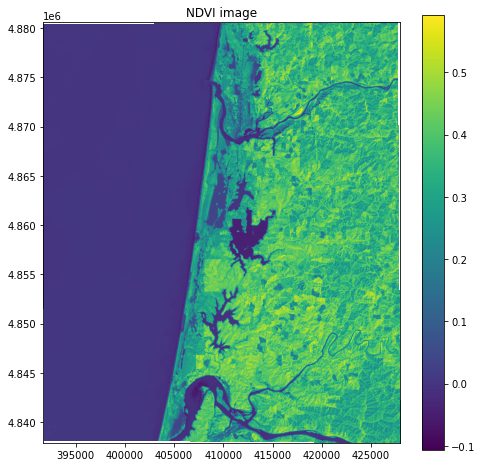

In [94]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

# Question 3 Color Infared Composite

In [95]:
color_infared = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))

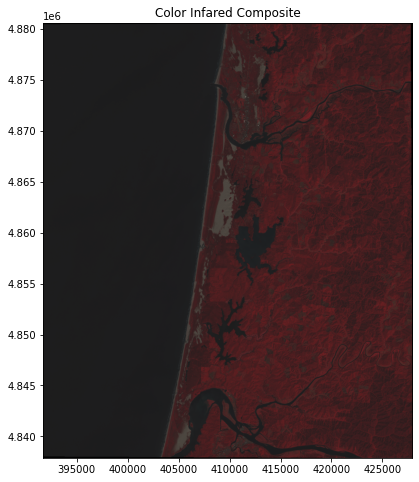

In [96]:
# Plot as Color Infared Composite image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(color_infared, extent=full_extent)
ax.set_title("Color Infared Composite")
plt.show()

# Question 1

In [97]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

In [98]:
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

In [99]:
# Next, find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

/Users/zachary/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/zachary/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


# a) the air temperature (in F) and cloud cover (in %) in Florence, OR (in 2020) on January 31, 2020?

In [102]:
fahrenheit = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (fahrenheit))

Air temperature in Florence on Jan 31, 2020 = 53.82 F


In [103]:
print('Cloud cover in Florence on Jan 31, 2020 = %.2f %%' % (florence_weather['tcc'][30].values * 100))

Cloud cover in Florence on Jan 31, 2020 = 99.98 %


# b) the air temperature (in F) and cloud cover (in %) in Eugene, OR (in 2020) on February 15, 2020?

In [104]:
eugene_weather = xds_daily.sel(latitude=44.052985, longitude=-123.085284, method='nearest')

/Users/zachary/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/zachary/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [105]:
fahrenheit = (eugene_weather['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (fahrenheit))

Air temperature in Eugene on Feb 15, 2020 = 42.00 F


In [106]:
print('Cloud cover in Euegene on Feb 15, 2020 = %.2f %%' % (eugene_weather['tcc'][45].values * 100))

Cloud cover in Euegene on Feb 15, 2020 = 99.99 %


# Question 2 (Each subquestion displays coordinate values and then I put my final answer in a markdown cell with the source in parenthesis since the website provided has a daily limit)

# a) Highest average air temperature (i.e. hottest place)

In [107]:
xds_yearly = xds.resample(time='1y').mean()
high_temp_avg = xds_yearly['t2m'].argmax()
hot_idx = np.unravel_index(high_temp_avg, xds_yearly['t2m'].shape)
high_temp_lat = xds_yearly['t2m'][hot_idx].latitude
high_temp_long = xds_yearly['t2m'][hot_idx].longitude

In [108]:
high_temp_long

<xarray.DataArray 'longitude' ()>
array(-111.25, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -111.2
    latitude   float32 28.99
Attributes:
    units:      degrees_east
    long_name:  longitude

In [109]:
high_temp_lat

<xarray.DataArray 'latitude' ()>
array(28.99, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -111.2
    latitude   float32 28.99
Attributes:
    units:      degrees_north
    long_name:  latitude

# Plan de Ayala Hermosillo México had the highest average temperature (Reverse Geocoding Tool)

# b) Lowest average air temperature (i.e. coldest place)

In [110]:
low_temp_avg = xds_yearly['t2m'].argmin()
cold_idx = np.unravel_index(low_temp_avg, xds_yearly['t2m'].shape)
cold_temp_lat = xds_yearly['t2m'][cold_idx].latitude
cold_temp_long = xds_yearly['t2m'][cold_idx].longitude

In [111]:
cold_temp_lat

<xarray.DataArray 'latitude' ()>
array(43.99, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -109.8
    latitude   float32 43.99
Attributes:
    units:      degrees_north
    long_name:  latitude

In [112]:
cold_temp_long

<xarray.DataArray 'longitude' ()>
array(-109.75, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -109.8
    latitude   float32 43.99
Attributes:
    units:      degrees_east
    long_name:  longitude

# Cody Wyoming United States is the average coldest place (Reverse Geocoding Tool)

# c) Highest average cloudiness (i.e. cloudiest place)

In [113]:
high_cloud_avg = xds_yearly['tcc'].argmax()
hcloud_idx = np.unravel_index(high_cloud_avg, xds_yearly['tcc'].shape)
high_cloud_lat = xds_yearly['tcc'][hcloud_idx].latitude
high_cloud_long = xds_yearly['tcc'][hcloud_idx].longitude

In [114]:
high_cloud_lat

<xarray.DataArray 'latitude' ()>
array(49.24, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -125.0
    latitude   float32 49.24
Attributes:
    units:      degrees_north
    long_name:  latitude

In [115]:
high_cloud_long 

<xarray.DataArray 'longitude' ()>
array(-125., dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -125.0
    latitude   float32 49.24
Attributes:
    units:      degrees_east
    long_name:  longitude

# Port Alberni British Columbia Canada had the highest average cloud coverage (Reverse Geocoding Tool)

# d) Lowest average cloudiest (i.e. least cloudy place)

In [116]:
low_cloud_avg = xds_yearly['tcc'].argmin()
lcloud_idx = np.unravel_index(low_cloud_avg, xds_yearly['tcc'].shape)
low_cloud_lat = xds_yearly['tcc'][lcloud_idx].latitude
low_cloud_long = xds_yearly['tcc'][lcloud_idx].longitude

In [117]:
low_cloud_lat

<xarray.DataArray 'latitude' ()>
array(31.49, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -114.8
    latitude   float32 31.49
Attributes:
    units:      degrees_north
    long_name:  latitude

In [118]:
low_cloud_long

<xarray.DataArray 'longitude' ()>
array(-114.75, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-12-31
    longitude  float32 -114.8
    latitude   float32 31.49
Attributes:
    units:      degrees_east
    long_name:  longitude

# These coordinates land on the northern shore area of the gulf of California (Google Maps)

# e) Place with highest range in air temperature

In [119]:
xds_min = xds.resample(time='1d').min()
xds_max = xds.resample(time='1d').max()
xds_diff = xds_max - xds_min

high_range = xds_diff['t2m'].argmax()

hrange = np.unravel_index(high_range, xds_diff['t2m'].shape)
hrange_lat = xds_diff['t2m'][hrange].latitude
hrange_long = xds_diff['t2m'][hrange].longitude

In [120]:
hrange_lat

<xarray.DataArray 'latitude' ()>
array(37.49, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-09-08
    longitude  float32 -104.0
    latitude   float32 37.49
Attributes:
    units:      degrees_north
    long_name:  latitude

In [121]:
hrange_long

<xarray.DataArray 'longitude' ()>
array(-104., dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-09-08
    longitude  float32 -104.0
    latitude   float32 37.49
Attributes:
    units:      degrees_east
    long_name:  longitude

# The place with the highest temperature range was Northeast of Model Colorado (Google Maps)

# f) Place with the absolute coldest temperature on a single day

In [122]:
the_coldest = xds_daily['t2m'].argmin()
coldest = np.unravel_index(the_coldest, xds_daily['t2m'].shape)
coldest_lat = xds_daily['t2m'][coldest].latitude
coldest_long = xds_daily['t2m'][coldest].longitude

In [123]:
coldest_lat

<xarray.DataArray 'latitude' ()>
array(48.74, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-01-15
    longitude  float32 -111.2
    latitude   float32 48.74
Attributes:
    units:      degrees_north
    long_name:  latitude

In [124]:
coldest_long

<xarray.DataArray 'longitude' ()>
array(-111.25, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-01-15
    longitude  float32 -111.2
    latitude   float32 48.74
Attributes:
    units:      degrees_east
    long_name:  longitude

# The single coldest measurment occured just Southwest of Mt Brown Montana (google maps)